In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
sess =tf.Session()

In [2]:
mnist = tf.keras.datasets.mnist
(train_data,train_label),(test_data,test_label) = mnist.load_data()

In [3]:
# Normalization 
train_data = train_data/256
test_data = test_data/256

In [4]:
train_shape = np.shape(train_data)
train_data_flat = np.reshape(train_data,[train_shape[0],-1])
N_train = train_shape[0]
data_dim = train_data_flat.shape[1]
minibatch_size = 1000

In [5]:
class Layer:
    def __init__(self,inp,out,activation=tf.nn.relu):
        self.W = tf.Variable(tf.truncated_normal([inp, out], stddev=0.1))
        self.activation = activation
        self.bias = tf.Variable(np.zeros(out),dtype=tf.float32)

    def layer_output(self,x):
        return self.activation(tf.matmul(x,self.W) +self.bias)
    

In [6]:
train_x = tf.placeholder(tf.float32,(minibatch_size,data_dim))
train_y = tf.placeholder(tf.int32,(minibatch_size,))

In [7]:
layer1 = Layer(data_dim,500)
layer2 = Layer(500,400)
layer3 = Layer(400,200)
layer4 = Layer(200,10,activation=tf.nn.softmax)


l1_out = layer1.layer_output(tf.to_float(train_x))
l2_out = layer2.layer_output(l1_out)
l3_out = layer3.layer_output(l2_out)
l4_out = tf.matmul(l3_out,layer4.W) + layer4.bias

In [8]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf.one_hot(train_y,10),logits=l4_out))

In [9]:
optimizer = tf.train.AdamOptimizer(0.0001)
train = optimizer.minimize(loss)

In [10]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [11]:
# minibatching because the training is super slow

loss_arr = []
for i in range(1000):
    rand_index = np.random.choice(N_train, size=minibatch_size)
    t_x = train_data_flat[rand_index]
    t_y = train_label[rand_index]    
    _, loss_value = sess.run([train,loss],feed_dict={train_x:t_x,train_y:t_y})
    loss_arr.append(loss_value)


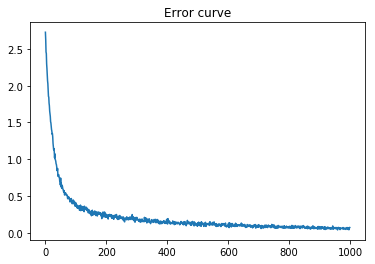

In [21]:
plt.plot(np.arange(len(loss_arr)),loss_arr)
plt.title("Error curve")
# plt.savefig("MLP-MNIST-err")
plt.show()


In [13]:
def batch_eval(data,label):
    print(data.shape)
    
    ypred = []
    for i in range(int(data.shape[0]/1000)):
        
        t_x = data[i*1000:(i+1)*1000]
        t_y = label[i*1000:(i+1)*1000]   
        soft_pred = sess.run(l4_out,feed_dict={train_x:t_x,train_y:t_y})
        pred = np.argmax(soft_pred,axis=1)
        ypred.append(pred)
    return np.reshape(np.array(ypred),(-1))

In [14]:
ypred = batch_eval(train_data_flat,train_label)
print("Accuracy on training data: %.3f"%(np.mean(np.equal(ypred,train_label))*100))

(60000, 784)
Accuracy on training data: 98.388


In [15]:
ypred = batch_eval(np.reshape(test_data,(10000,-1)),test_label)
print("Accuracy on test data: %.3f"%(np.mean(np.equal(ypred,test_label))*100))

(10000, 784)
Accuracy on test data: 97.170


In [16]:
conf = np.zeros((10,10),dtype=np.int32)
for x,y in zip(ypred,test_label):
    if x!=y:
        conf[x,y] +=1


In [18]:
import itertools

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

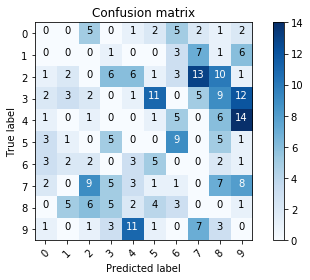

In [20]:
plot_confusion_matrix(conf,[ str(x) for x in np.arange(0,10)])